In [1]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%config InlineBackend.figure_format = 'retina'
sns.set_context('notebook')

In [3]:
sns.set(rc={'figure.figsize':(15, 6)})

In [4]:
df=pd.read_excel("/Users/saurav.raj1/Desktop/data.xlsx")

In [5]:
df.head(2)

,Emp ID,Manager's Emp ID,Employee name
0,1,7.0,a
1,2,7.0,c


In [6]:
df

,Emp ID,Manager's Emp ID,Employee name
0,1,7.0,a
1,2,7.0,c
2,3,7.0,b
3,4,8.0,d
4,5,8.0,e
5,6,8.0,f
6,7,9.0,g
7,8,NaN,h
8,9,NaN,i
9,10,9.0,j


In [28]:
!pip install pandasql

In [31]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())


In [34]:
q = """SELECT * 
       FROM df 
       LIMIT 10;"""

names = pysqldf(q)

names

,Emp ID,Manager's Emp ID,Employee name
0,1,7.0,a
1,2,7.0,c
2,3,7.0,b
3,4,8.0,d
4,5,8.0,e
5,6,8.0,f
6,7,9.0,g
7,8,NaN,h
8,9,NaN,i
9,10,9.0,j


In [36]:
df.columns

Index(['Emp ID', 'Manager's Emp ID', 'Employee name'], dtype='object')

In [66]:
q = """SELECT count("Emp ID") as count,sup."Manager's Emp ID"
       FROM df  sup
       group by 2
       ORDER BY count DESC;"""

names = pysqldf(q)

names

,count,Manager's Emp ID
0,4,9.0
1,3,8.0
2,3,7.0
3,2,NaN


In [55]:
df

,Emp ID,Manager's Emp ID,Employee name
0,1,7.0,a
1,2,7.0,c
2,3,7.0,b
3,4,8.0,d
4,5,8.0,e
5,6,8.0,f
6,7,9.0,g
7,8,NaN,h
8,9,NaN,i
9,10,9.0,j


In [77]:
q="""SELECT
    sup."Employee name",
    COUNT(sub."Emp ID") AS number_of_employees
FROM df sub
JOIN df sup
ON sub."Manager's Emp ID" = sup."Emp ID"
GROUP BY sup."Emp ID", sup."Emp ID";"""


names =pysqldf(q)
names

,Employee name,number_of_employees
0,g,3
1,h,3
2,i,4


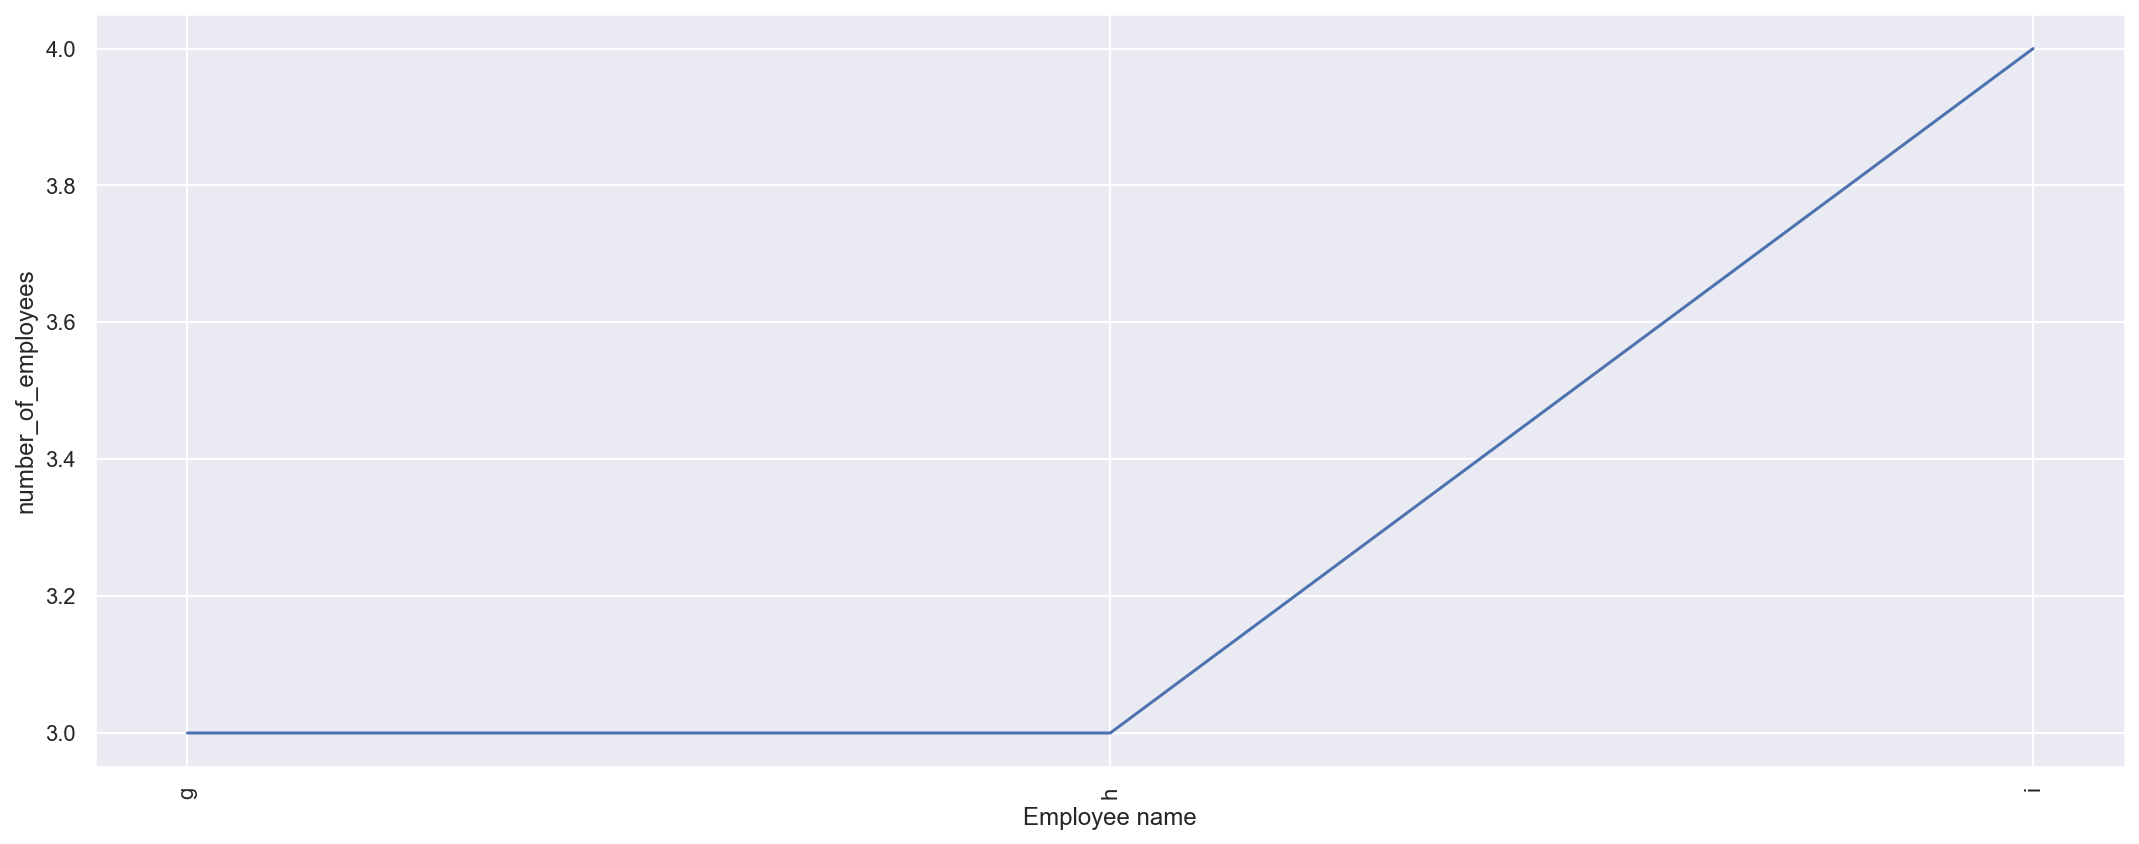

In [78]:
line = sns.lineplot(x="Employee name", 
                    y="number_of_employees", 
                    data=names)
plt.xticks(rotation=90)
plt.tight_layout()